In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [3]:
SongData = pd.read_pickle('SongSmall.pkl')

In [4]:
SongData.head()

,artist_familiarity,artist_hotttnesss,song_hotttnesss,duration,end_of_fade_in,idx_segments_confidence,idx_segments_loudness_max,idx_segments_loudness_start,idx_segments_start,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence
0,0.581794,0.401998,0.60212,218.93179,0.247,"[0.0, 1.0, 0.483, 0.137, 0.42, 1.0, 0.257, 1.0...","[-60.0, -31.646, -34.565, -38.407, -34.696, -2...","[-60.0, -60.0, -40.84, -40.401, -38.456, -39.6...","[0.0, 0.24671, 0.47116, 0.80376, 0.89551, 1.12...",1,0.736,-11.197,0,0.636,218.932,92.198,4,0.778
1,0.63063,0.4175,NaN,148.03546,0.148,"[0.0, 1.0, 0.93, 0.643, 0.761, 0.21, 1.0, 0.71...","[-60.0, -14.269, -10.165, -18.098, -19.136, -1...","[-60.0, -60.0, -23.521, -25.16, -27.133, -24.2...","[0.0, 0.14803, 0.68104, 0.95492, 1.19878, 1.45...",6,0.169,-9.843,0,0.43,137.915,121.274,4,0.384
2,0.487357,0.343428,NaN,177.47546,0.282,"[0.0, 1.0, 0.106, 0.048, 0.282, 0.69, 0.308, 0...","[-59.895, -11.914, -10.344, -9.678, -9.22, -8....","[-60.0, -59.9, -12.744, -12.003, -12.991, -15....","[0.0, 0.28154, 0.48395, 0.6937, 0.97859, 1.361...",8,0.643,-9.689,1,0.565,172.304,100.07,1,0.0
3,0.630382,0.454231,NaN,233.40363,0.0,"[1.0, 1.0, 0.919, 0.591, 0.841, 0.174, 0.753, ...","[-18.682, -9.55, -9.709, -8.633, -7.434, -11.7...","[-60.0, -27.665, -21.241, -15.222, -18.915, -1...","[0.0, 0.70517, 1.03052, 1.21052, 1.52404, 1.72...",0,0.751,-9.013,1,0.749,217.124,119.293,4,0.0
4,0.651046,0.401724,0.604501,209.60608,0.066,"[0.0, 1.0, 0.359, 1.0, 0.963, 0.544, 1.0, 0.75...","[-59.813, -7.713, -16.13, -2.512, -8.088, -8.7...","[-60.0, -59.828, -19.551, -32.609, -21.899, -2...","[0.0, 0.06603, 0.24395, 0.57034, 0.92567, 1.26...",2,0.092,-4.501,1,0.371,198.699,129.738,4,0.562


In [5]:
SongData.isnull().sum()

artist_familiarity                3
artist_hotttnesss                 0
song_hotttnesss                2557
duration                          0
end_of_fade_in                    0
idx_segments_confidence           0
idx_segments_loudness_max         0
idx_segments_loudness_start       0
idx_segments_start                0
key                               0
key_confidence                    0
loudness                          0
mode                              0
mode_confidence                   0
start_of_fade_out                 0
tempo                             0
time_signature                    0
time_signature_confidence         0
dtype: int64

# Removing redundant columns

In [6]:
SongData=SongData[(SongData.song_hotttnesss!=0) & (SongData.song_hotttnesss.notna())]

print(SongData.shape)

def filter_arrays(arr):
    return len(arr) > 5
col_list = ['idx_segments_confidence',
       'idx_segments_loudness_max', 'idx_segments_loudness_start',
       'idx_segments_start']

# Apply the filter function to the specified column
SongData_clean = SongData
for col in col_list:
    SongData_clean = SongData_clean[SongData_clean[col].apply(filter_arrays)]
print(SongData_clean.shape)

(2562, 18)
(2562, 18)


In [7]:
new_rows={}
def change_array_to_columns(col,name):
    for row in col:
        count =0
        for entry in range(6):
            count+=1
            if name+'_'+str(count) in new_rows.keys():
                new_rows[name+'_'+str(count)].append(row[entry])
            else:

                new_rows[name+'_'+str(count)]=[]
                new_rows[name+'_'+str(count)].append(row[entry])


col_list = ['idx_segments_confidence',
       'idx_segments_loudness_max', 'idx_segments_loudness_start',
       'idx_segments_start']

for col in col_list:
    change_array_to_columns(SongData_clean[col],col)

In [8]:
SongData_clean=SongData_clean.reset_index(drop=True)
SongData_clean.shape

(2562, 18)

In [9]:
print(pd.DataFrame(new_rows).shape)
print(SongData_clean.shape)
SongData_new =  pd.concat([SongData_clean,pd.DataFrame(new_rows)],axis =1)


SongData_new.drop(col_list,inplace=True,axis=1)
SongData_new.columns

(2562, 24)
(2562, 18)


Index(['artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss',
       'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'start_of_fade_out', 'tempo',
       'time_signature', 'time_signature_confidence',
       'idx_segments_confidence_1', 'idx_segments_confidence_2',
       'idx_segments_confidence_3', 'idx_segments_confidence_4',
       'idx_segments_confidence_5', 'idx_segments_confidence_6',
       'idx_segments_loudness_max_1', 'idx_segments_loudness_max_2',
       'idx_segments_loudness_max_3', 'idx_segments_loudness_max_4',
       'idx_segments_loudness_max_5', 'idx_segments_loudness_max_6',
       'idx_segments_loudness_start_1', 'idx_segments_loudness_start_2',
       'idx_segments_loudness_start_3', 'idx_segments_loudness_start_4',
       'idx_segments_loudness_start_5', 'idx_segments_loudness_start_6',
       'idx_segments_start_1', 'idx_segments_start_2', 'idx_segments_start_3',
       'idx_segments_start_4', 'idx_seg

In [10]:
SongData_new.shape
SongData_new.drop(['idx_segments_start_1'],inplace=True,axis=1)

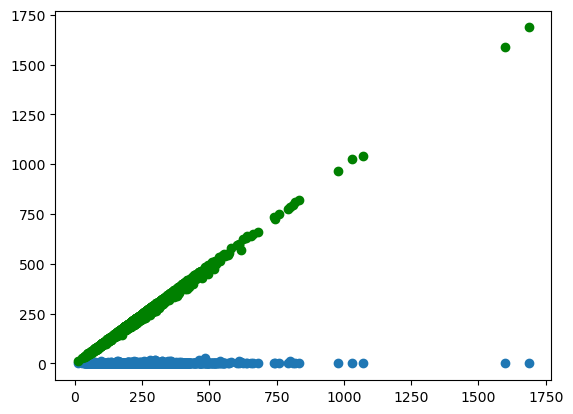

In [11]:
test = SongData_new[:]
plt.scatter(test['duration'],test['end_of_fade_in'])
plt.scatter(test['duration'],test['start_of_fade_out'],color='green')
plt.show()

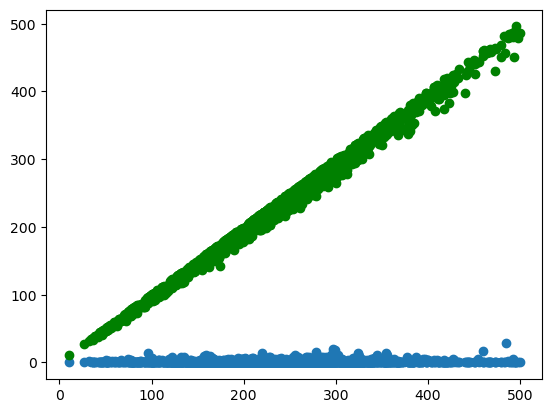

In [12]:
outlier_indices = np.where(test['duration'] > 500)
no_outliers = test.drop(outlier_indices[0])
plt.scatter(no_outliers['duration'],no_outliers['end_of_fade_in'])
plt.scatter(no_outliers['duration'],no_outliers['start_of_fade_out'],color='green')
plt.show()

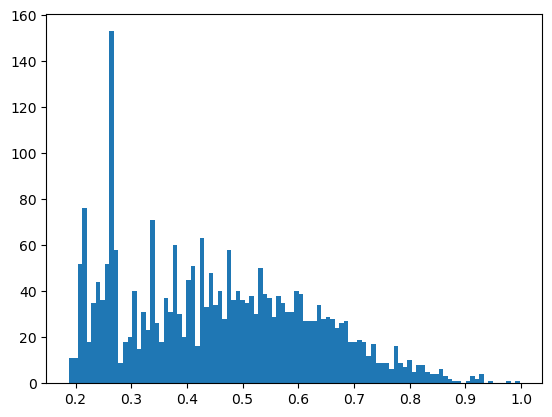

In [13]:
plt.hist(no_outliers.song_hotttnesss,100)
plt.show()

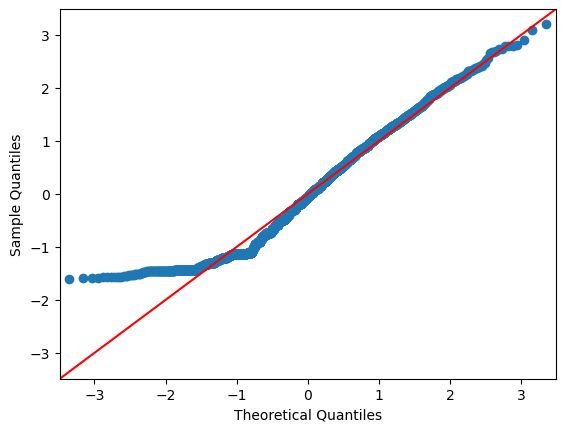

In [15]:
import statsmodels.api as sm
import pylab as py
arr = np.array((no_outliers.song_hotttnesss))

arr=np.array(arr, dtype=[('O', float)]).astype(float)

sm.qqplot(arr, line ='45',fit=True)
py.show()

In [16]:
from sklearn.svm import SVR
model = SVR()
y = pd.Series(no_outliers["song_hotttnesss"])
X = no_outliers.drop(["song_hotttnesss"],axis = 1)

print(y.shape)
print(X.shape)

(2509,)
(2509, 36)


In [17]:
from sklearn.preprocessing import StandardScaler
cols = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X,columns=cols)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size = 0.3)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, 1328 to 1061
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   artist_familiarity             1756 non-null   float64
 1   artist_hotttnesss              1756 non-null   float64
 2   duration                       1756 non-null   float64
 3   end_of_fade_in                 1756 non-null   float64
 4   key                            1756 non-null   float64
 5   key_confidence                 1756 non-null   float64
 6   loudness                       1756 non-null   float64
 7   mode                           1756 non-null   float64
 8   mode_confidence                1756 non-null   float64
 9   start_of_fade_out              1756 non-null   float64
 10  tempo                          1756 non-null   float64
 11  time_signature                 1756 non-null   float64
 12  time_signature_confidence      1756 non-null   flo

0.20807618679344467 0.8541936093093392 0.18789497928688675 0.9977583963402685


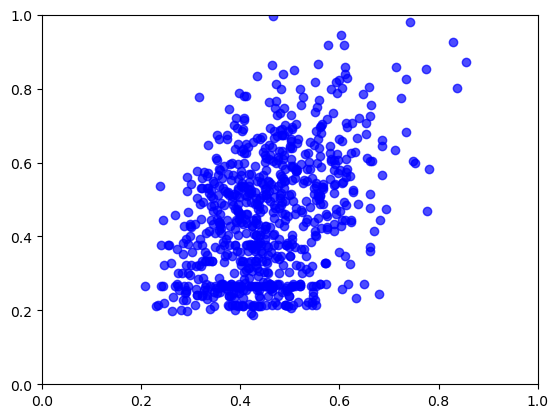

In [19]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(min(y_pred),max(y_pred),min(y_test),max(y_test))
plt.scatter(pd.Series(y_pred),y_test,color='b',alpha=.7)
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

In [101]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mean_squared_score = mean_squared_error(y_pred, y_test)
print(mean_squared_score)
print(r2_score(y_test, y_pred))

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 987 to 1061
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   artist_familiarity             912 non-null    float64
 1   artist_hotttnesss              912 non-null    float64
 2   duration                       912 non-null    float64
 3   end_of_fade_in                 912 non-null    float64
 4   key                            912 non-null    float64
 5   key_confidence                 912 non-null    float64
 6   loudness                       912 non-null    float64
 7   mode                           912 non-null    float64
 8   mode_confidence                912 non-null    float64
 9   start_of_fade_out              912 non-null    float64
 10  tempo                          912 non-null    float64
 11  time_signature                 912 non-null    float64
 12  time_signature_confidence      912 non-null    float

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.196 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.211 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.160 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.142 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.172 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.300 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.204 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.195 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.157 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.124 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.176 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.173 total time=   0.4s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.132 total time=   0.4s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.178 total time=   0.4s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.221 total time=   0.4s
[CV 5/5] END ....C=1000, gam

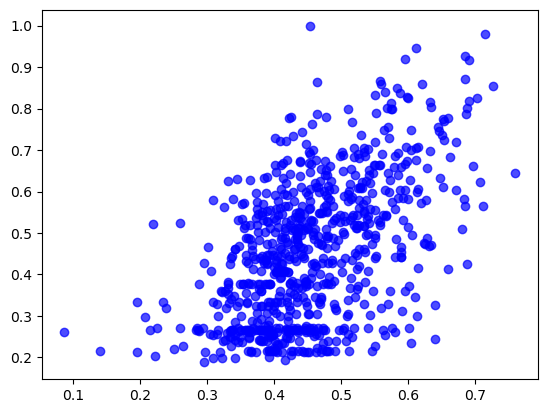

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_estimator_)
plt.scatter(pd.Series(grid.predict(X_test)),y_test,color='b',alpha=.7)
plt.show()

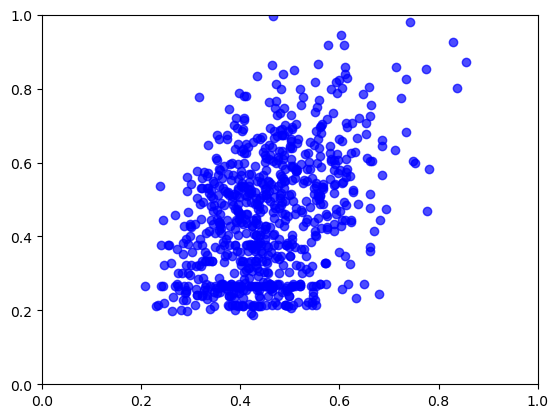

In [21]:
from sklearn.ensemble import AdaBoostRegressor

AdaB = AdaBoostRegressor()

AdaB.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(pd.Series(y_pred),y_test,color='b',alpha=.7)
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.314 total time=   0.4s
[CV 2/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.332 total time=   0.4s
[CV 3/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.239 total time=   0.4s
[CV 4/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.269 total time=   0.4s
[CV 5/5] END learning_rate=0.0001, loss=linear, n_estimators=25;, score=0.278 total time=   0.4s
[CV 1/5] END learning_rate=0.0001, loss=linear, n_estimators=50;, score=0.311 total time=   0.8s
[CV 2/5] END learning_rate=0.0001, loss=linear, n_estimators=50;, score=0.320 total time=   0.8s
[CV 3/5] END learning_rate=0.0001, loss=linear, n_estimators=50;, score=0.248 total time=   0.8s
[CV 4/5] END learning_rate=0.0001, loss=linear, n_estimators=50;, score=0.263 total time=   0.9s
[CV 5/5] END learning_rate=0.0001, loss=linear, n_estimators=50;,

[CV 4/5] END learning_rate=0.001, loss=linear, n_estimators=50;, score=0.266 total time=   0.8s
[CV 5/5] END learning_rate=0.001, loss=linear, n_estimators=50;, score=0.276 total time=   0.9s
[CV 1/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.311 total time=   2.4s
[CV 2/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.330 total time=   2.3s
[CV 3/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.240 total time=   2.2s
[CV 4/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.268 total time=   2.3s
[CV 5/5] END learning_rate=0.001, loss=linear, n_estimators=125;, score=0.284 total time=   2.3s
[CV 1/5] END learning_rate=0.001, loss=linear, n_estimators=150;, score=0.316 total time=   2.8s
[CV 2/5] END learning_rate=0.001, loss=linear, n_estimators=150;, score=0.327 total time=   2.8s
[CV 3/5] END learning_rate=0.001, loss=linear, n_estimators=150;, score=0.237 total time=   2.7s
[CV 4/5] END learning_rate=0.001

[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=150;, score=0.241 total time=   2.7s
[CV 4/5] END learning_rate=0.01, loss=linear, n_estimators=150;, score=0.265 total time=   2.7s
[CV 5/5] END learning_rate=0.01, loss=linear, n_estimators=150;, score=0.277 total time=   2.7s
[CV 1/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.321 total time=   9.1s
[CV 2/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.316 total time=   9.0s
[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.249 total time=   9.1s
[CV 4/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.267 total time=   9.0s
[CV 5/5] END learning_rate=0.01, loss=linear, n_estimators=500;, score=0.278 total time=   9.2s
[CV 1/5] END learning_rate=0.01, loss=exponential, n_estimators=25;, score=0.322 total time=   0.4s
[CV 2/5] END learning_rate=0.01, loss=exponential, n_estimators=25;, score=0.332 total time=   0.4s
[CV 3/5] END learning_rate=0.01,

[CV 3/5] END learning_rate=0.1, loss=exponential, n_estimators=25;, score=0.247 total time=   0.4s
[CV 4/5] END learning_rate=0.1, loss=exponential, n_estimators=25;, score=0.266 total time=   0.4s
[CV 5/5] END learning_rate=0.1, loss=exponential, n_estimators=25;, score=0.278 total time=   0.4s
[CV 1/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.316 total time=   0.9s
[CV 2/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.310 total time=   0.8s
[CV 3/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.242 total time=   0.8s
[CV 4/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.263 total time=   0.8s
[CV 5/5] END learning_rate=0.1, loss=exponential, n_estimators=50;, score=0.277 total time=   0.8s
[CV 1/5] END learning_rate=0.1, loss=exponential, n_estimators=125;, score=0.312 total time=   2.0s
[CV 2/5] END learning_rate=0.1, loss=exponential, n_estimators=125;, score=0.293 total time=   2.0s
[CV 3/5]

[CV 3/5] END learning_rate=1.0, loss=exponential, n_estimators=125;, score=0.175 total time=   1.1s
[CV 4/5] END learning_rate=1.0, loss=exponential, n_estimators=125;, score=0.178 total time=   1.1s
[CV 5/5] END learning_rate=1.0, loss=exponential, n_estimators=125;, score=0.184 total time=   1.1s
[CV 1/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.231 total time=   1.3s
[CV 2/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.172 total time=   1.3s
[CV 3/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.187 total time=   1.3s
[CV 4/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.181 total time=   1.3s
[CV 5/5] END learning_rate=1.0, loss=exponential, n_estimators=150;, score=0.188 total time=   1.3s
[CV 1/5] END learning_rate=1.0, loss=exponential, n_estimators=500;, score=0.187 total time=   3.6s
[CV 2/5] END learning_rate=1.0, loss=exponential, n_estimators=500;, score=0.110 total time=   3.5s


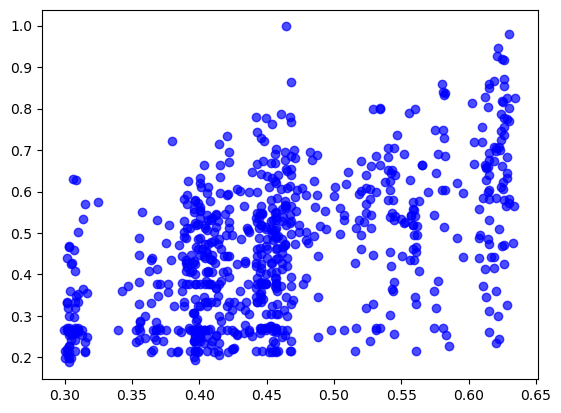

In [22]:
param_grid = {
    'n_estimators':[25,50,125,150,500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
    'loss':['linear','exponential','square']
}

grid = GridSearchCV(AdaBoostRegressor(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

plt.scatter(pd.Series(grid.predict(X_test)),y_test,color='b',alpha=.7)
# plt.ylim([-1,3])
# plt.xlim([-1,3])
plt.show()

0.20807618679344467 0.8541936093093392 0.18789497928688675 0.9977583963402685


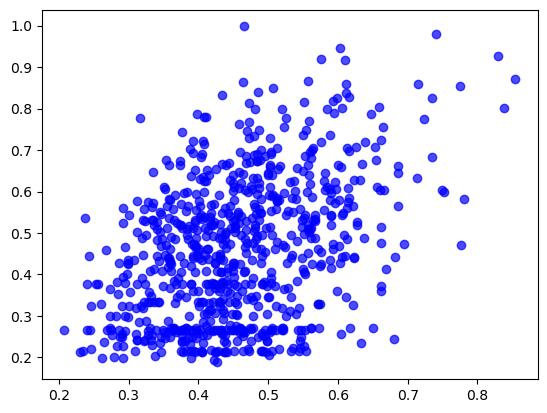

In [23]:
print(min(y_pred),max(y_pred),min(y_test),max(y_test))
plt.scatter(pd.Series(y_pred),y_test,color='b',alpha=.7)

# plt.ylim([0, 1])
# plt.xlim([0,1])
plt.show()

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mean_squared_score = mean_squared_error(y_pred, y_test)
print(mean_squared_score)

0.025576134930493842


In [25]:
r2_score(y_test, y_pred)

0.11456729252513986